### Columns data in a dataset can be of 2 types :
    
    1. Continuous : age, price, demand, sales etc
        
        
    2. Categorical : 
        a. Nominal - no orderness in the  categories.. just randomly distributed e.g : gender, job, hobbies
        
        b. Ordinal - Have a certain trend/order in distribution. e.g : Rating, grades, levels

### Why Imputation ?

    Need :
        
    When we perform ML, we need to provide a continuous and clean data to our model. In such case, missing values can create a serious problem
    and result in incorrect analysis.


However :
    
    when we get our dataset, we need to understand why and when do we need imputation. Imputation somewhere adds garbage and distorts the data
   
    Hence impacting our analysis. It is better to first understand and analyse our raw data.
   
    Hence during EDA we can analyse our data first and then imoute it for further ML stages.

In [ ]:
### Never use MEAN or MODE as a measure of imputation for skewed distributions (i.e data with outliers). Always go for MEDIAN ()

Category wise Imputation :
    
    Median where or groupby etc. i.e adding a category while imputing

In [1]:
#import the useful libraries.

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('https://query.data.world/s/srgmggc27wsevjcgo3idzko6scwls3')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


#### Check data types of all columns and identify the ones with incorrect data type 


 Year_of_release is in float but should be Object or int as we wont be performing any mathematical operation on it.
    It can't be in date/time format as we need to have the complete date for that. Here we only have year
   
 If there is a column that you don't want to add, subtract or apply any maths operations there is no need for int
    : Hence, Object should be the type 
        
    e.g :  2012.0+2011.0
      
    
 Critic_count : float --- int  - https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html
        
 User_score : Object --- float
    
 User_count : float --- int

In [ ]:
#### Changing the data type of above columns
##### Note : do not delete the nulls as we might lose imp data

In [6]:
df['Year_of_Release'] = df['Year_of_Release'].astype(object)


In [7]:
df['Critic_Count'] = df['Critic_Count'].astype(int)

# error as we have missing values unidentified by pandas i.e NaN (Pandas uses NaN to represent missing values)

# NaN belongs to float and thus the complete column has been converted to Float

#Solution: use Int64 which is nullable data type given by Pandas. int is datatype of Numpy array datatype

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [10]:
df['Critic_Count'] = df['Critic_Count'].astype('Int64')

# int: Numpy
# Int64: For integers in pandas 


**NOTE :** Pandas is written on top of Numpy.. numpy is parent and pandas is child. We can use child function in parent
        but can't use parent funtion in Child. Hence, Int64 will work for both, but int will only work for Numpy

In [8]:
df['User_Score'] = df['User_Score'].astype(float)


ValueError: could not convert string to float: 'tbd'

In [11]:
# Solution :

#to convert a object column to numeric(i.e int or float) we use : pd.to_numeric
# It will automatically identifies the correct numeric type of the columns: int/float

#It is an intelligent function--> automatically identifies the correct numeric datatype of a object column
# It will automatically identify the correct numeric type of the columns: int/float


pd.to_numeric(df['User_Score'])

#error again because there are invalid parsings like tbd

ValueError: Unable to parse string "tbd" at position 119

In [ ]:
#to overcome above error

help(pd.to_numeric)


errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    
    -> If 'raise', then invalid parsing will raise an exception. 
    -> If 'coerce', then invalid parsing will be set as NaN. 
    -> If 'ignore', then invalid parsing will return the input.

coerce : sets invalid parsings (which here is 'tbd' which is a non numeric value and can't be converted to int or float) to NaN


In [101]:
#pd.to_numeric(df['User_Score'], errors = 'coerce')
#coerce : sets invalid parsings (which here is 'tbd' which is a non numeric value and can't be converted to int or float) to NaN

df['User_Score'] = pd.to_numeric(df['User_Score'], errors = 'coerce')
#will return float where needed and int where needed==> thus smart

ValueError: Unable to parse string "tbd" at position 119

In [102]:
#now converting User_Count

df['User_Count'] = df['User_Count'].astype(int)

ValueError: cannot convert to 'int32'-dtype NumPy array with missing values. Specify an appropriate 'na_value' for this dtype.

In [24]:
df['User_Count'] = df['User_Count'].astype('Int64')

#### All fixed now

In [32]:
#However, there is more straight fwd method

#while reading our data, we can instruct Pandas to read a column in a particular type that I want

df = pd.read_csv('https://query.data.world/s/srgmggc27wsevjcgo3idzko6scwls3',
                dtype = {'Year_of_Release': object, "Critic_Count": "Int64", "User_Count":"Int64"})


In [30]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,<NA>,NaN,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,<NA>,NaN,<NA>,NaN,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  16717 non-null  object 
 1   Platform              16719 non-null  object 
 2   Year_of_Release       16450 non-null  object 
 3   Genre                 16717 non-null  object 
 4   Publisher             16665 non-null  object 
 5   NA_Sales              16719 non-null  float64
 6   EU_Sales              16719 non-null  float64
 7   JP_Sales              16719 non-null  float64
 8   Other_Sales           16719 non-null  float64
 9   Global_Sales          16719 non-null  float64
 10  Critic_Score          8137 non-null   float64
 11  Critic_Count          8137 non-null   Int64  
 12  User_Score            7590 non-null   float64
 13  User_Count            7590 non-null   Int64  
 14  Developer             10096 non-null  object 
 15  Rating             

### Find percentage of NUlls for various columns

In [79]:
df.shape

(16719, 17)

In [81]:
df.shape[0]
#total number of rows

16719

In [109]:
df.isnull().sum()/df.shape[0]*100

Name                     0.011962
Platform                 0.000000
Year_of_Release          1.608948
Genre                    0.011962
Publisher                0.322986
NA_Sales                 0.000000
EU_Sales                 0.000000
JP_Sales                 0.000000
Other_Sales              0.000000
Global_Sales             0.000000
Critic_Score            51.330821
Critic_Count            51.330821
User_Score              54.602548
User_Count              54.602548
Developer               39.613613
Rating                  40.486871
Critic_Score_Imputed     5.484778
dtype: float64

In [64]:
df.isnull()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Critic_Score_Imputed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False
16715,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False
16716,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False
16717,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False


#### Method 1 : Using drop()


 **Dropping a column** :

    df.drop(columns = 'Name') is same as ... df.drop('Name', axis =1)


 **Dropping a row** :

    df.drop(index=0) //using index is same as ... df.drop(0, axis =0)


**note :**
    
    Knowing the index or row number corresponding to Name=  null is a must in order to use this method, orelse it will drop all rows having null values

In [66]:
df.isnull().sum()


Name                       2
Platform                   0
Year_of_Release          269
Genre                      2
Publisher                 54
NA_Sales                   0
EU_Sales                   0
JP_Sales                   0
Other_Sales                0
Global_Sales               0
Critic_Score            8582
Critic_Count            8582
User_Score              6704
User_Count              9129
Developer               6623
Rating                  6769
Critic_Score_Imputed     917
dtype: int64

In [120]:
##Identify the row number for rows where the Name column is missing

df['Name'].isnull()

#False: There is no null
#True : where we have null


0        False
1        False
2        False
3        False
4        False
         ...  
16714    False
16715    False
16716    False
16717    False
16718    False
Name: Name, Length: 16717, dtype: bool

In [121]:
df['Name'].isnull().sum()

#only 2 nulls in Name column

0

In [113]:
df[df['Name'].isnull()].index
#this will exactly give the index/indices where we have nulls

Int64Index([659, 14246], dtype='int64')

In [110]:
df.shape

(16719, 17)

In [118]:
# This will drop the index corresponding to the nulls without rows where Name was missing

df= df.drop(index = df[df['Name'].isnull()].index)


In [119]:
df.shape

(16717, 17)

#### Method 2 : negation (~)


    Make sure to assign it back to the original dataframe in case of using this method


In [37]:
#df[~df['Name'].isnull()]

#Now we can save it to another variable and use

df1 =df[~df['Name'].isnull()]

# False: No null: True
# True: Null: False


#### Method 3 : dropna : by default axis = 0 i.e rows

    This method is specifically created for dropping all rows having any null.. if we don't pass any parameter

In [ ]:
df.dropna()  
#this will delete/drop entire rows have any one or more nulls

In [19]:
df.dropna(subset = ['Name'], axis = 0)

#if we do not mention Name of column, it will look for all columns and delete the entire row having nulls
#hence it is always recommended to use subset with dropna

### Plot Crititc Score and User Score to check if it's normally distributed or not?


<AxesSubplot:title={'center':'User Score'}, xlabel='User_Score', ylabel='Density'>

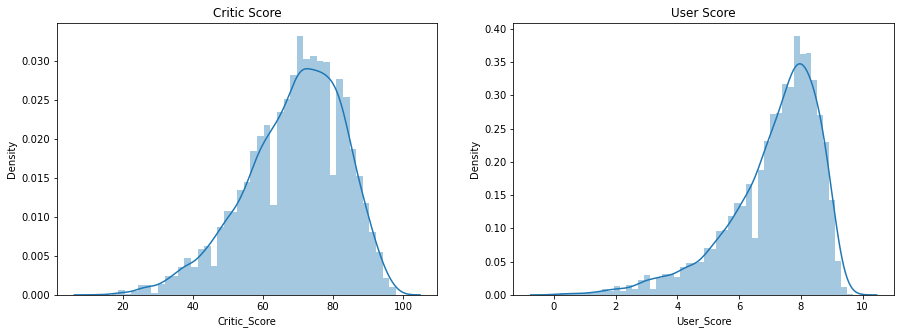

In [104]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Critic Score")
sns.distplot(df.Critic_Score.dropna())

plt.subplot(1,2,2)
plt.title("User Score")
sns.distplot(df.User_Score.dropna())


### Check the distribution for Crtitc Score column and check if it is having outliers or not? Should we use mean or median

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

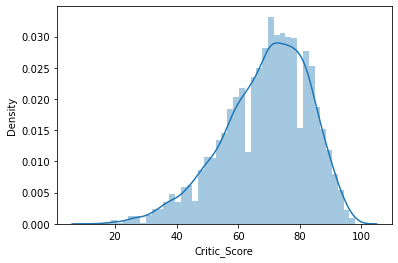

In [38]:
sns.distplot(df['Critic_Score'].dropna())

### Category wise Imputation

In [39]:
df['Critic_Score'].median()

71.0

In [40]:
#e.g of a categorical imputation

df.groupby('Publisher')['Critic_Score'].median()['Nintendo']

76.0

In [90]:
#fill the missing values in Critic score column for publisher data with a median of critic score for 50 publisher data records

df.groupby('Publisher')['Critic_Score'].median()[:50]

Publisher
10TACLE Studios                 42.0
1C Company                      77.0
20th Century Fox Video Games     NaN
2D Boy                          90.0
3DO                             53.0
49Games                          NaN
505 Games                       65.0
5pb                             67.0
7G//AMES                         NaN
989 Sports                       NaN
989 Studios                      NaN
AQ Interactive                  79.5
ASC Games                        NaN
ASCII Entertainment             66.0
ASCII Media Works                NaN
ASK                              NaN
Abylight                         NaN
Acclaim Entertainment           68.0
Accolade                         NaN
Ackkstudios                     75.0
Acquire                         61.0
Activision                      72.0
Activision Blizzard             87.0
Activision Value                44.0
Adeline Software                 NaN
Aerosoft                         NaN
Agatsuma Entertainment      

In [41]:
#find median of Critic score column for publisher data with a median of Idea factory data

df.groupby('Publisher')['Critic_Score'].median()['Idea Factory']

61.0

In [42]:
df.groupby('Publisher')['Critic_Score'].median()['Codemasters']

75.0

In [43]:
df.groupby('Publisher')['Critic_Score'].median()['Tecmo Koei']

67.0

In [44]:
#Performing segment wise median imputation

df['Critic_Score_Imputed'] = df.groupby('Publisher')['Critic_Score'].apply(lambda x: x.fillna(x.median()))

In [45]:
df[['Name', 'Publisher', 'Critic_Score', 'Critic_Score_Imputed']]

,Name,Publisher,Critic_Score,Critic_Score_Imputed
0,Wii Sports,Nintendo,76.0,76.0
1,Super Mario Bros.,Nintendo,NaN,76.0
2,Mario Kart Wii,Nintendo,82.0,82.0
3,Wii Sports Resort,Nintendo,80.0,80.0
4,Pokemon Red/Pokemon Blue,Nintendo,NaN,76.0
...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,Tecmo Koei,NaN,67.0
16715,LMA Manager 2007,Codemasters,NaN,75.0
16716,Haitaka no Psychedelica,Idea Factory,NaN,61.0
16717,Spirits & Spells,Wanadoo,NaN,74.0


In [91]:
df[['Name', 'Publisher', 'Critic_Score', 'Critic_Score_Imputed']].head()

,Name,Publisher,Critic_Score,Critic_Score_Imputed
0,Wii Sports,Nintendo,76.0,76.0
1,Super Mario Bros.,Nintendo,NaN,76.0
2,Mario Kart Wii,Nintendo,82.0,82.0
3,Wii Sports Resort,Nintendo,80.0,80.0
4,Pokemon Red/Pokemon Blue,Nintendo,NaN,76.0


In [92]:
df[['Name', 'Publisher', 'Critic_Score', 'Critic_Score_Imputed']].tail()

,Name,Publisher,Critic_Score,Critic_Score_Imputed
16714,Samurai Warriors: Sanada Maru,Tecmo Koei,NaN,67.0
16715,LMA Manager 2007,Codemasters,NaN,75.0
16716,Haitaka no Psychedelica,Idea Factory,NaN,61.0
16717,Spirits & Spells,Wanadoo,NaN,74.0
16718,Winning Post 8 2016,Tecmo Koei,NaN,67.0


### Plot the Year wise count of video games release and find the year with the maximum game release

<AxesSubplot:>

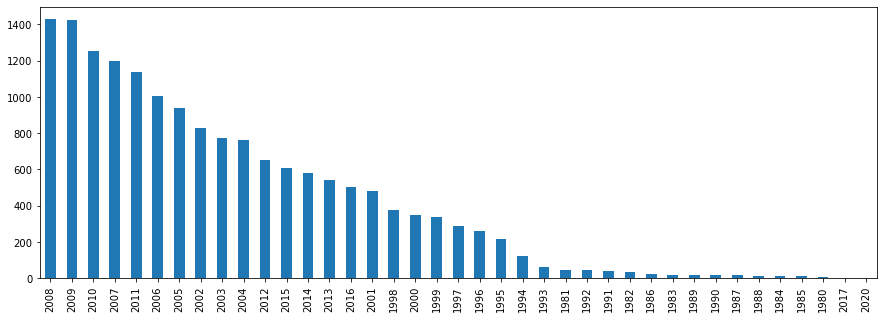

In [51]:
##using Pandas and Seaborn Count Plot

df.Year_of_Release.value_counts().plot(kind = 'bar', figsize = (15,5))


#### Plot the count of games release per platfrom and find the platfrom with the maximum relase

<AxesSubplot:>

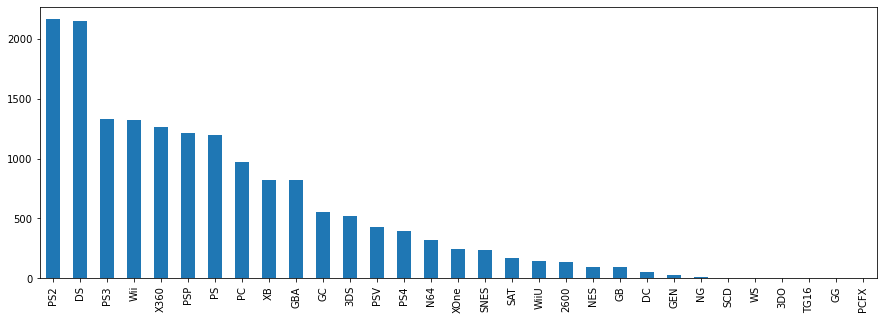

In [53]:
df.Platform.value_counts().plot(kind = 'bar', figsize = (15,5))

#### Plot the Genre wise count of vido game release. Don't use value count, use countplot from sns

In [93]:
df.Platform.value_counts().index

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'XOne', 'SNES', 'SAT', 'WiiU', '2600',
       'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG',
       'PCFX'],
      dtype='object')

<AxesSubplot:xlabel='Genre', ylabel='count'>

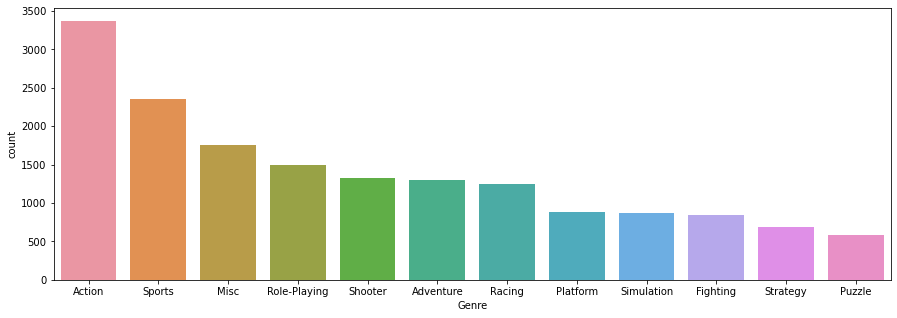

In [54]:
plt.figure(figsize = (15,5))
sns.countplot(df['Genre'], order = df.Genre.value_counts().index)

In [55]:
df.Genre.value_counts().index

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'],
      dtype='object')

In [56]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or li

### Plot the count of games that were released per genre and find the genre with maxium game release

<AxesSubplot:>

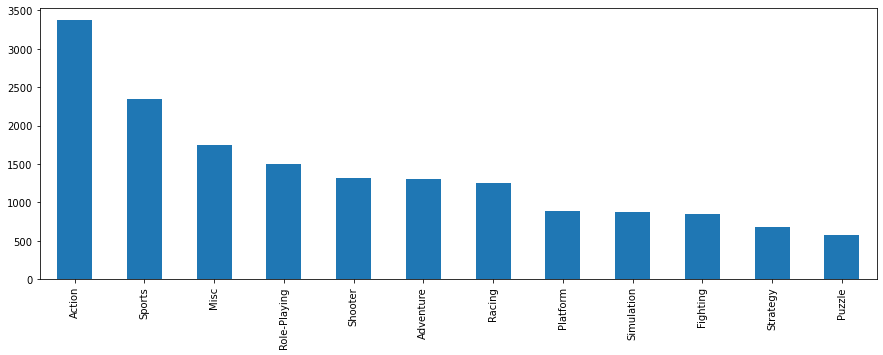

In [94]:
df.Genre.value_counts().plot(kind = 'bar', figsize = (15,5))

### Find the name of Top Publisher under each Genre

In [95]:
df.groupby(['Genre', 'Publisher']).count().unstack()

Name                                                 \
Publisher    10TACLE Studios 1C Company 20th Century Fox Video Games 2D Boy   
Genre                                                                         
Action                   NaN        NaN                          4.0    NaN   
Adventure                1.0        NaN                          NaN    NaN   
Fighting                 NaN        NaN                          NaN    NaN   
Misc                     NaN        NaN                          NaN    NaN   
Platform                 NaN        NaN                          NaN    NaN   
Puzzle                   1.0        NaN                          NaN    1.0   
Racing                   NaN        1.0                          NaN    NaN   
Role-Playing             NaN        1.0                          NaN    NaN   
Shooter                  NaN        NaN                          1.0    NaN   
Simulation               NaN        NaN                          NaN    NaN   
Sports                   NaN        NaN                          NaN    NaN   
Strategy                 1.0        1.0                          NaN    NaN   

                                                                ...  \
Publisher      3DO 49Games 505 Games   5pb 7G//AMES 989 Sports  ...   
Genre                                                           ...   
Action        17.0     NaN      21.0   5.0      NaN        NaN  ...   
Adventure      3.0     NaN       7.0  50.0      NaN        NaN  ...   
Fighting       1.0     NaN      10.0   1.0      NaN        NaN  ...   
Misc           NaN     NaN      31.0   NaN      1.0        NaN  ...   
Platform       1.0     NaN       6.0   NaN      NaN        NaN  ...   
Puzzle         1.0     NaN      15.0   NaN      NaN        NaN  ...   
Racing         NaN     NaN       2.0   NaN      NaN        NaN  ...   
Role-Playing   1.0     NaN      10.0   1.0      NaN        NaN  ...   
Shooter        5.0     NaN      18.0   3.0      NaN        NaN  ...   
Simulation     NaN     NaN      41.0   2.0      2.0        NaN  ...   
Sports         6.0     1.0      27.0   NaN      NaN        1.0  ...   
Strategy       1.0     NaN       3.0   NaN      NaN        NaN  ...   

             Critic_Score_Imputed                                           \
Publisher             Zushi Games bitComposer Games dramatic create fonfun   
Genre                                                                        
Action                        1.0               NaN             0.0    NaN   
Adventure                     1.0               NaN             0.0    NaN   
Fighting                      NaN               NaN             NaN    NaN   
Misc                          1.0               NaN             0.0    NaN   
Platform                      NaN               NaN             NaN    NaN   
Puzzle                        2.0               NaN             NaN    NaN   
Racing                        3.0               1.0             NaN    NaN   
Role-Playing                  1.0               NaN             NaN    NaN   
Shooter                       2.0               NaN             NaN    NaN   
Simulation                    2.0               4.0             NaN    0.0   
Sports                        3.0               NaN             NaN    NaN   
Strategy                      2.0               NaN             NaN    NaN   

                                                                              \
Publisher    iWin id Software imageepoch Inc. inXile Entertainment mixi, Inc   
Genre                                                                          
Action        NaN         NaN             NaN                  NaN       0.0   
Adventure     NaN         NaN             0.0                  NaN       NaN   
Fighting      NaN         NaN             NaN                  NaN       NaN   
Misc          NaN         NaN             NaN                  NaN       NaN   
Platform      NaN         NaN            

In [96]:
df.groupby(['Genre', 'Publisher'])['Name'].count().unstack()

Publisher,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,...,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Genre,,,,,,,,,,,,,,,,,,,,,
Action,NaN,NaN,4.0,NaN,17.0,NaN,21.0,5.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Adventure,1.0,NaN,NaN,NaN,3.0,NaN,7.0,50.0,NaN,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Fighting,NaN,NaN,NaN,NaN,1.0,NaN,10.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Misc,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,1.0,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,NaN,NaN,NaN,NaN,1.0,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puzzle,1.0,NaN,NaN,1.0,1.0,NaN,15.0,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Racing,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role-Playing,NaN,1.0,NaN,NaN,1.0,NaN,10.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Shooter,NaN,NaN,1.0,NaN,5.0,NaN,18.0,3.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [97]:
df.groupby(['Genre', 'Publisher'])['Name'].count().unstack().idxmax(axis = 1)

Genre
Action                  Activision
Adventure             Idea Factory
Fighting        Namco Bandai Games
Misc                       Ubisoft
Platform                  Nintendo
Puzzle                    Nintendo
Racing             Electronic Arts
Role-Playing    Namco Bandai Games
Shooter                 Activision
Simulation                 Ubisoft
Sports             Electronic Arts
Strategy        Namco Bandai Games
dtype: object

In [98]:
help(df.unstack)

Help on method unstack in module pandas.core.frame:

unstack(level=-1, fill_value=None) method of pandas.core.frame.DataFrame instance
    Pivot a level of the (necessarily hierarchical) index labels.
    
    Returns a DataFrame having a new level of column labels whose inner-most level
    consists of the pivoted index labels.
    
    If the index is not a MultiIndex, the output will be a Series
    (the analogue of stack when the columns are not a MultiIndex).
    
    Parameters
    ----------
    level : int, str, or list of these, default -1 (last level)
        Level(s) of index to unstack, can pass level name.
    fill_value : int, str or dict
        Replace NaN with this value if the unstack produces missing values.
    
    Returns
    -------
    Series or DataFrame
    
    See Also
    --------
    DataFrame.pivot : Pivot a table based on column values.
    DataFrame.stack : Pivot a level of the column labels (inverse operation
        from `unstack`).
    
    Examples


In [57]:
df.pivot_table(columns = 'Publisher', index = 'Genre', values = 'Name', aggfunc = 'count').idxmax(axis = 1)

Genre
Action                  Activision
Adventure             Idea Factory
Fighting        Namco Bandai Games
Misc                       Ubisoft
Platform                  Nintendo
Puzzle                    Nintendo
Racing             Electronic Arts
Role-Playing    Namco Bandai Games
Shooter                 Activision
Simulation                 Ubisoft
Sports             Electronic Arts
Strategy        Namco Bandai Games
dtype: object

In [99]:
df.pivot_table(columns = 'Publisher', index = 'Genre', values = 'Name', aggfunc = 'count').idxmax(axis = 0)

Publisher
10TACLE Studios                    Adventure
1C Company                            Racing
20th Century Fox Video Games          Action
2D Boy                                Puzzle
3DO                                   Action
                                    ...     
id Software                          Shooter
imageepoch Inc.                    Adventure
inXile Entertainment            Role-Playing
mixi, Inc                             Action
responDESIGN                          Sports
Length: 581, dtype: object

<AxesSubplot:xlabel='Platform', ylabel='count'>

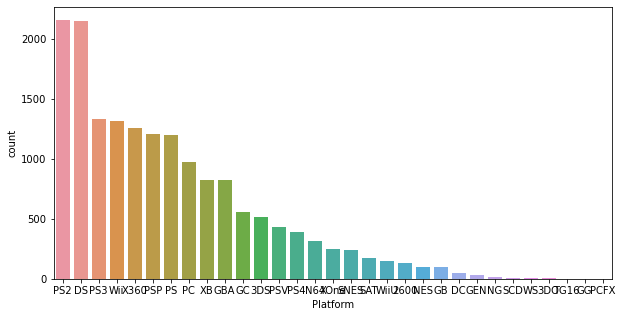

In [100]:
plt.figure(figsize=[10,5])
sns.countplot(df.Platform,order=df.Platform.value_counts().index)